In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv('./test.csv', parse_dates=['datetime'])
train_df = pd.read_csv('./train.csv', parse_dates=['datetime'])

In [3]:
all_df = pd.concat((train_df, test_df), axis=0).reset_index()
all_df.head()

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [4]:
all_df.tail()

,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
17374,6488,12.880,NaN,NaN,2012-12-31 19:00:00,0,60,NaN,1,10.66,2,11.0014,1
17375,6489,12.880,NaN,NaN,2012-12-31 20:00:00,0,60,NaN,1,10.66,2,11.0014,1
17376,6490,12.880,NaN,NaN,2012-12-31 21:00:00,0,60,NaN,1,10.66,1,11.0014,1
17377,6491,13.635,NaN,NaN,2012-12-31 22:00:00,0,56,NaN,1,10.66,1,8.9981,1
17378,6492,13.635,NaN,NaN,2012-12-31 23:00:00,0,65,NaN,1,10.66,1,8.9981,1


In [10]:
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df), len(all_df)))
test_index[-1]

17378

In [6]:
all_df.isnull().sum()

index            0
atemp            0
casual        6493
count         6493
datetime         0
holiday          0
humidity         0
registered    6493
season           0
temp             0
weather          0
windspeed        0
workingday       0
dtype: int64

In [11]:
x = np.array([np.inf, -np.inf, np.nan, -128, 128])
np.nan_to_num(x)

array([ 1.79769313e+308, -1.79769313e+308,  0.00000000e+000,
       -1.28000000e+002,  1.28000000e+002])

In [12]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.log(y+1))
    log2 = np.nan_to_num(np.log(y_ + 1))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [13]:
submission_df = pd.read_csv('./sampleSubmission.csv')
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [14]:
rmsle(submission_df['count'].values, np.random.randint(0, 100, size=len(submission_df)))

3.734477349805105

In [15]:
del all_df['casual']
del all_df['registered']
del all_df['index']

In [16]:
pre_df = all_df.merge(pd.get_dummies(all_df['season'], prefix='season'), left_index=True,right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,season_2,season_3,season_4
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,1,0,0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0


In [17]:
pre_df = pre_df.merge(pd.get_dummies(all_df['weather'], prefix='weather'), left_index=True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0,1,0,0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0,1,0,0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0


In [18]:
pre_df['datetime'].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-31T21:00:00.000000000', '2012-12-31T22:00:00.000000000',
       '2012-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [19]:
pre_df['year'] = pre_df['datetime'].dt.year
pre_df['month'] = pre_df['datetime'].dt.month
pre_df['day'] = pre_df['datetime'].dt.day
pre_df['hour'] = pre_df['datetime'].dt.hour
pre_df['weekday'] = pre_df['datetime'].dt.weekday

In [20]:
pre_df = pre_df.merge(pd.get_dummies(pre_df['weekday'], prefix='weekday'),left_index=True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,...,1,0,5,0,0,0,0,0,1,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,...,1,1,5,0,0,0,0,0,1,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,...,1,2,5,0,0,0,0,0,1,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,...,1,3,5,0,0,0,0,0,1,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,...,1,4,5,0,0,0,0,0,1,0


In [21]:
pre_df.dtypes

atemp                float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
season                 int64
temp                 float64
weather                int64
windspeed            float64
workingday             int64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

In [22]:
category_variable_list = ["season","weather","workingday","season_1","season_2","season_3","season_4","weather_1","weather_2","weather_3","weather_4","year","month","day","hour","weekday","weekday_0","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6"]
for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype("category")

In [23]:
pre_df.dtypes

atemp                float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
season              category
temp                 float64
weather             category
windspeed            float64
workingday          category
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [24]:
train_df = pre_df.iloc[train_index]

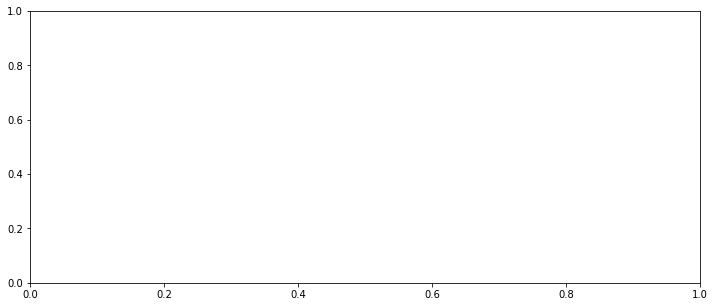

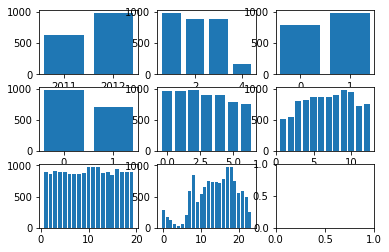

In [27]:
fig, ax = plt.subplots()
train_dffig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(12, 5)
axes[0][0].bar(train_df["year"], train_df["count"])
axes[0][1].bar(train_df["weather"], train_df["count"])
axes[0][2].bar(train_df["workingday"], train_df["count"])
axes[1][0].bar(train_df["holiday"], train_df["count"])
axes[1][1].bar(train_df["weekday"], train_df["count"])
axes[1][2].bar(train_df["month"], train_df["count"])
axes[2][0].bar(train_df["day"], train_df["count"])
axes[2][1].bar(train_df["hour"], train_df["count"])
plt.show()

In [28]:
series_data = train_df.groupby(['month'])['count'].mean()

In [31]:
series_data.index.tolist()[:5]

[1, 2, 3, 4, 5]

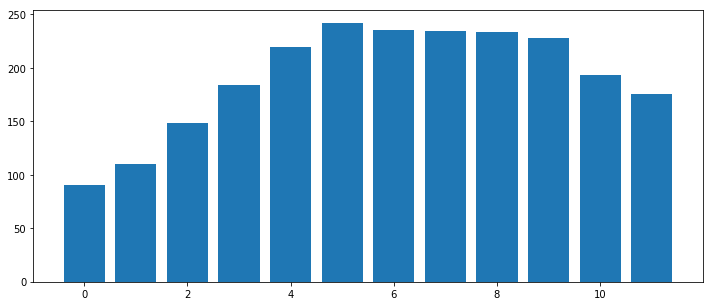

In [32]:
flg, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
flg.set_size_inches(12, 5)
plt.show()

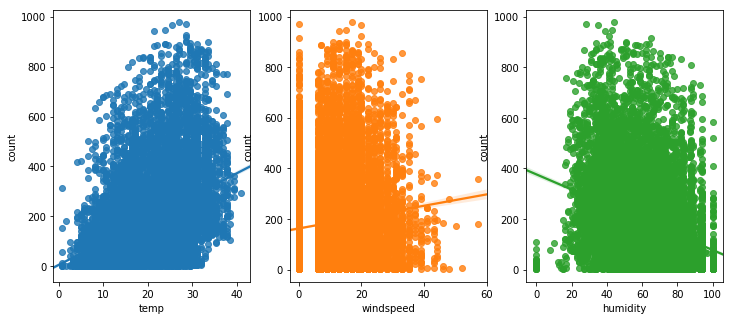

In [33]:
import seaborn as sn

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=train_df,ax=ax1)
sn.regplot(x="windspeed", y="count", data=train_df,ax=ax2)
sn.regplot(x="humidity", y="count", data=train_df,ax=ax3)
plt.show()

In [34]:
category_variable_list[:5]

['season', 'weather', 'workingday', 'season_1', 'season_2']

In [35]:
continuous_variable_list = ["temp","humidity","windspeed","atemp"]

In [36]:
season_list = ['season_1', 'season_2', 'season_3', 'season_4']
weather_list = ['weather_1', 'weather_2', 'weather_3', 'weather_4']
weekday_list = ['weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']

In [37]:
category_varialbe_list = ["season","holiday","workingday","weather","weekday","month","year","hour"]

In [38]:
all_variable_list = continuous_variable_list + category_varialbe_list

In [39]:
all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)

In [40]:
all_variable_list

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [41]:
number_of_variables = len(all_variable_list)
number_of_variables

15

In [42]:
varaible_combinations = []
import itertools
for L in range(8, number_of_variables+1):
    for subset in itertools.combinations(all_variable_list, L):
        temp = []
        for variable in subset:
            if isinstance(variable, list):
                for value in variable:
                    temp.append(value)
            else:
                temp.append(variable)
        varaible_combinations.append(temp)

In [43]:
len(varaible_combinations)

16384

In [44]:
del pre_df["count"]

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import datetime

kf= KFold(n_splits=10)

y = train_df["count"].values
final_output = []
models = []

print(len(varaible_combinations))
ts = datetime.datetime.now()
for i, combination in enumerate(varaible_combinations):
    lr = LinearRegression(n_jobs=8)
    ridge = Ridge()
    lasso = Lasso()
    
    lr_result = []
    ridge_result = []
    lasso_result = []
    
    target_df = pre_df[combination]
    ALL = target_df.values
    std = StandardScaler()
    std.fit(ALL)
    ALL_scaled = std.transform(ALL)
    X = ALL_scaled[train_index]
    
    for train_data_index, test_data_index in kf.split(X):
        X_train = X[train_data_index]
        X_test = X[test_data_index]
        y_train = y[train_data_index]
        y_test = y[test_data_index]
        
        lr.fit(X_train, y_train)
        result = rmsle(y_test, lr.predict(X_test))
        lr_result.append(result)

        ridge.fit(X_train, y_train)
        result = rmsle(y_test, ridge.predict(X_test))
        ridge_result.append(result)

        lasso.fit(X_train, y_train)
        result = rmsle(y_test, lasso.predict(X_test))
        lasso_result.append(result)
    
    final_output.append([i, np.mean(lr_result), np.mean(ridge_result), np.mean(lasso_result)])
    models.append([lr, ridge, lasso])
    if i % 100 == 0:
        tf = datetime.datetime.now()
        te = tf - ts  
        print(i, te)
        ts = datetime.datetime.now()

16384


c:\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


0 0:00:00.973454
100 0:01:38.975389


c:\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


200 0:01:52.373228
300 0:01:50.057060
400 0:01:07.784932
500 0:01:02.735539
600 0:00:51.754620
700 0:00:45.455988
800 0:01:02.020036
900 0:01:48.674477
1000 0:02:10.352525
1100 0:02:47.961462
1200 0:02:17.047943
1300 0:01:40.198337
1400 0:01:20.873996
1500 0:01:28.029362
1600 0:00:58.549836
1700 0:01:21.680744
1800 0:02:48.861407
1900 0:02:46.245549
2000 0:02:19.783059
2100 0:02:38.300010
2200 0:02:54.268791
2300 0:02:11.118919
2400 0:02:12.635947
2500 0:01:58.437975
2600 0:01:55.231173
2700 0:01:44.849822
2800 0:02:32.022777
2900 0:02:21.752645
3000 0:02:11.522536
3100 0:02:31.804090
3200 0:02:39.229360
3300 0:01:37.948919
3400 0:01:27.523890
3500 0:00:54.582766
3600 0:00:51.709408
3700 0:00:46.018635
3800 0:00:41.786075
3900 0:00:44.620455
4000 0:01:17.403684
4100 0:01:44.607127
4200 0:01:40.881223
4300 0:02:01.083676
4400 13:35:29.661201


In [ ]:
labels = ["combination", "lr","ridge", "lasso"]

from pandas import DataFrame
result_df = DataFrame(final_output, columns=labels)
result_df.head()

In [ ]:
result_df.min()

In [ ]:
result_df["lasso"].sort_values().head()

In [ ]:
varaible_combinations[4752]

In [ ]:
target_df = pre_df[varaible_combinations[4752]]
ALL = target_df.values
std = StandardScaler()
std.fit(ALL)
ALL_scaled = std.transform(ALL)
X_submission_test = ALL_scaled[test_index]
X_submission_test.shape

In [ ]:
X_submission_test

In [ ]:
models[4752][2]

In [ ]:
final_result = models[4752][2].predict(X_submission_test)
final_result[final_result < 0] = 0

In [ ]:
final_result

In [ ]:
pre_df.iloc[test_index]["datetime"].head()

In [ ]:
data = {"datetime": pre_df.iloc[test_index]["datetime"], "count": final_result}
df_submission = DataFrame(data, columns=["datetime", "count"])
df_submission.head()

In [ ]:
df_submission.set_index('datetime').to_csv('submission_lasso_data.csv')